## Intro

A Time Series is an ordered sequence of values that are usually equally spaced over time.

If at each time space we have only a single value, we call it univariate time serie. if there are more than one value, we call it as mutivaluate time series.

## ML and time series

What types of things we can do with ML on time series?

1. Forecasting: Predict future values based on past values.

2. Impute data: project back into the past values based on data we already have. 

3. Anomaly detection: We can detect sudden changes in the time series behavior to detect anomalies.

4. Pattern recognition: We can detect the intrinsical components of a time series, in order to understand it, predict furute values of this components, etc.

## Common Patterns in time series

There are different types of time series, but a vast majority share some common patterns useful to learn:

1. Trend.

2. Seasonality.

3. Noise.

4. Autocorrelation.

Common time series compose all this behaviors.

## Non-stationary time series

A Non stationary time series is a serie that changes its main behavior on time.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

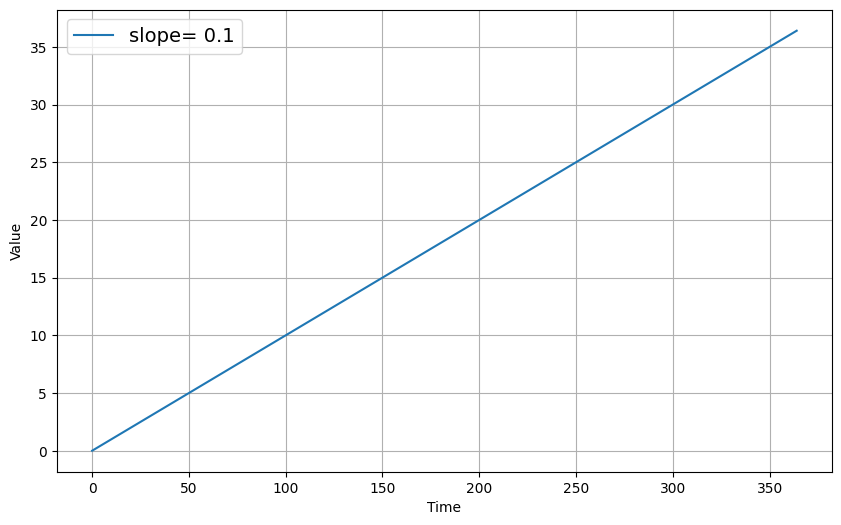

In [2]:
# --- TREND ---
time = np.arange(365)
slope = 0.1
my_serie = time*slope
start = 0
end = 365

plt.figure(figsize=(10,6))
plt.plot(time[start:end], my_serie[start:end], "-", label=f'slope= {slope}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

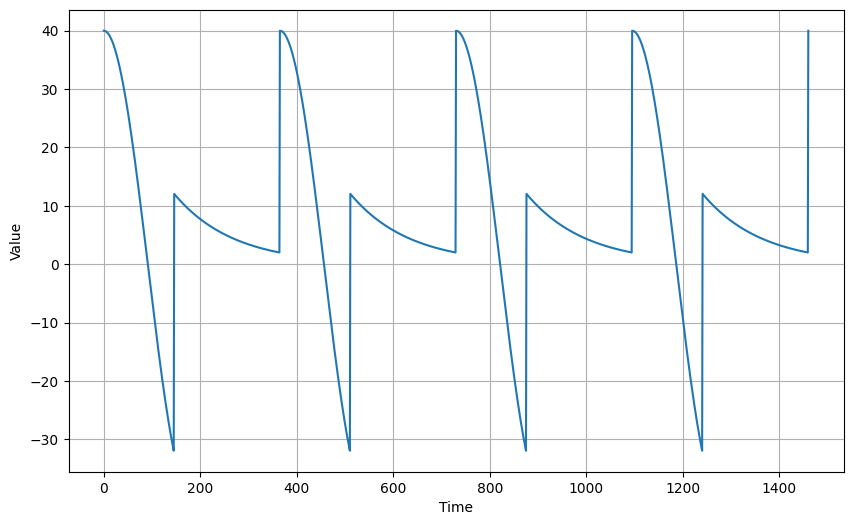

In [3]:
# --- SEASONALITY ---
time = np.arange(4*365 + 1)
period = 365
amplitude=40
phase=0

season_time = ((time+phase)%period)/period
data_pattern = amplitude*(np.where(season_time < 0.4, np.cos(season_time*2*np.pi), 1/(np.exp(3*season_time))))

plt.figure(figsize=(10,6))
plt.plot(time, data_pattern, "-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()

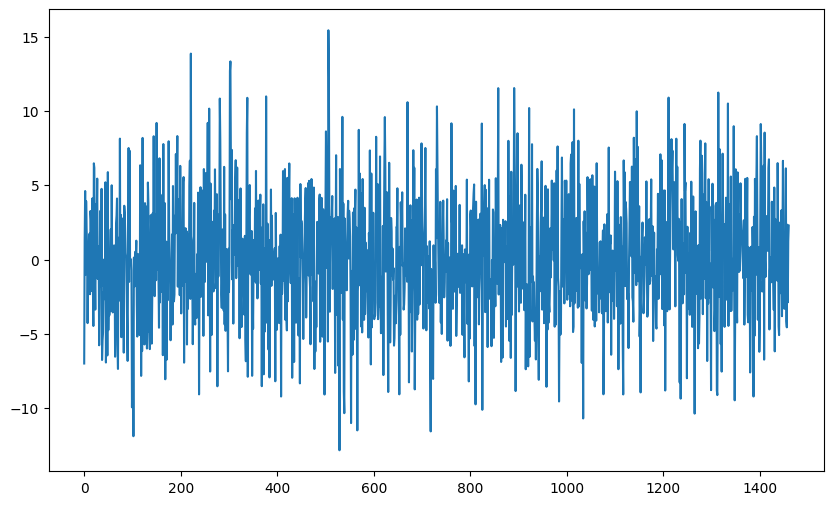

In [11]:
# --- NOISE
noise_level = 4
rnd = np.random.RandomState(100)
noise = rnd.randn(len(time)) * noise_level


plt.figure(figsize=(10,6))
plt.plot(time, noise)

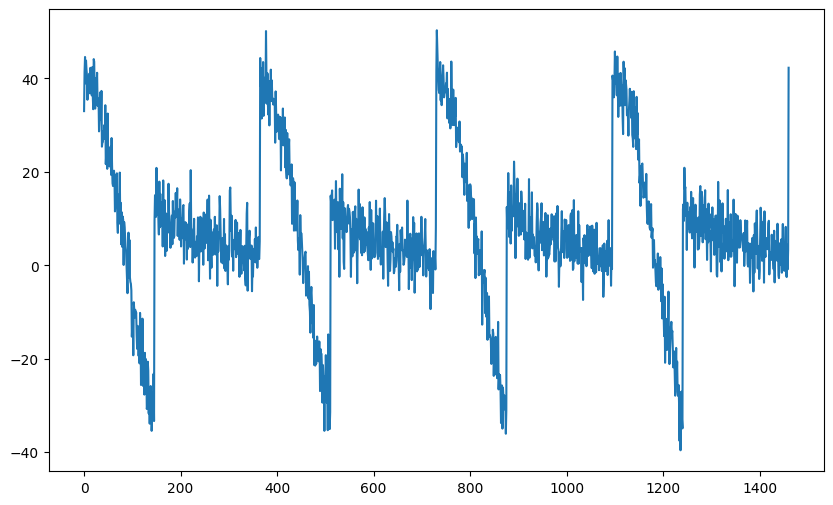

In [12]:
# We can add data+noise
plt.figure(figsize=(10,6))
plt.plot(time, data_pattern+noise)

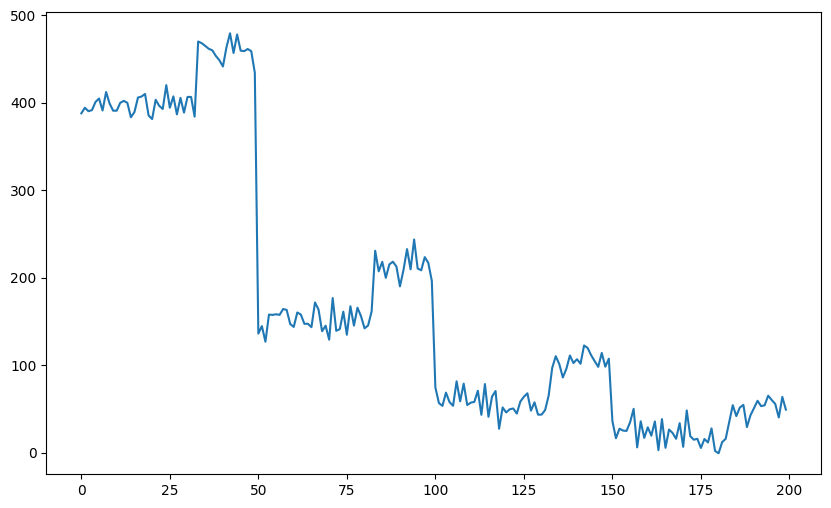

In [15]:
# --- Autocorrelation ---
amplitude = 10
rnd = np.random.RandomState(100)
ar = rnd.randn(len(time) + 50)
ar[:50] = 100
phi_1 = 0.5
phi_2 = -0.1

for step in range(50, len(time) + 50):
    ar[step] += phi_1 * ar[step-50]
    ar[step] += phi_2 * ar[step-33]

ar = ar[50:]*amplitude

plt.figure(figsize=(10,6))
plt.plot(time[:200], ar[:200])


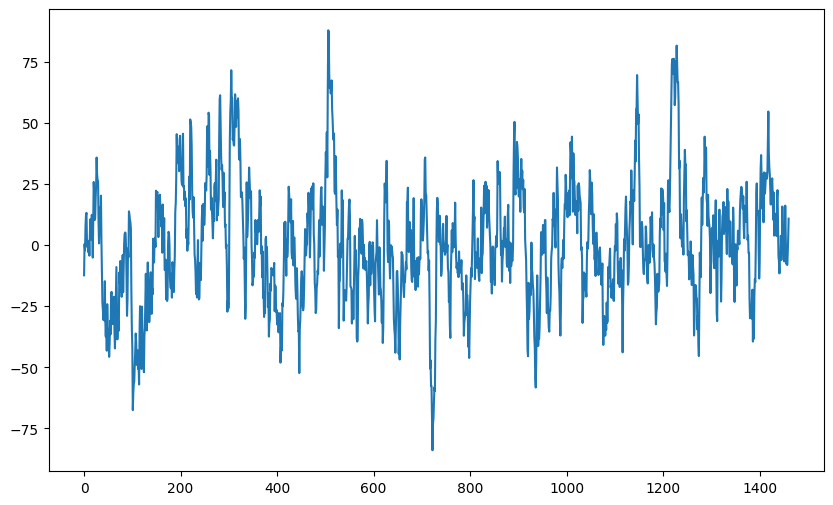

In [29]:
### Autocorrelation II

rnd = np.random.RandomState(100)
ar = rnd.randn(len(time) + 1)
phi = 0.9

for step in range(1, len(time) + 1):
    ar[step] += phi*ar[step-1]

ar = ar[1:] * amplitude

plt.figure(figsize=(10,6))
plt.plot(time, ar)

## References

- Ref. 1: Curso "Tensorflow for time series analysis". [Coursera Febrero 2024.]("https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/dWnOy/common-patterns-in-time-series")